In [2]:
import dataImport as dataI
import pandas as pd
import numpy as np
import matplotlib as plt


from sklearn.tree import DecisionTreeRegressor

In [3]:
(train,test) = dataI.dataImport()
train.head()

dataImport.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  trip_train["subscription_type"][trip_train["subscription_type"] == "Subscriber"] = 1
dataImport.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  trip_train["subscription_type"][trip_train["subscription_type"] == "Customer"] = 2
dataImport.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  trip_test["subscription_type"][trip_test["subscription_type"] == "Subscriber"] = 1
dataImport.py:25: SettingWithCopyWarning: 
A va

,duration,start_station_id,bike_id,subscription_type,zip_code,start_date_weekday,start_date_month,start_date_hour
0,396,50,187,1,94602,3,8,8
1,636,67,417,1,94133,0,7,22
2,334,77,281,1,94107,0,6,8
3,666,69,634,1,94602,0,1,16
4,318,67,607,1,94709,5,8,15


In [5]:
test

,start_station_id,bike_id,subscription_type,zip_code,start_date_weekday,start_date_month,start_date_hour
0,60,426,2,77009,5,10,11
1,51,454,1,94132,2,11,13
2,70,370,1,94107,3,6,17
3,72,451,1,94582,3,8,7
4,69,603,1,95014,4,6,8
5,61,478,1,94115,1,10,21
6,67,505,1,94025,2,3,18
7,48,356,1,94536,0,3,17
8,67,401,1,94102,6,7,11
9,48,363,1,94114,4,8,13


In [27]:
train.zip_code.unique()

array(['94602', '94133', '94107', ..., '77990', '91309', '60480'], dtype=object)

In [4]:
sample = train.sample(10)

In [35]:
sample

,duration,start_station_id,bike_id,subscription_type,zip_code,start_date_weekday,start_date_month,start_date_hour
205087,1245,82,504,1,94301,0,3,18
488154,301,70,290,1,94103,2,2,8
287752,1062,74,481,1,94107,2,6,17
438542,961,60,189,1,94105,0,1,7
247742,460,39,636,1,94107,2,3,13
49958,432,76,158,1,94607,3,6,9
312991,848,55,450,1,94611,3,4,8
121854,465,57,109,1,94403,2,1,19
411314,2460,38,13,2,94022,6,10,14
137684,739,50,559,1,94925,1,2,9


In [36]:
print sample.columns.tolist()

['duration', 'start_station_id', 'bike_id', 'subscription_type', 'zip_code', 'start_date_weekday', 'start_date_month', 'start_date_hour']


In [6]:
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(sample[['start_station_id', 'bike_id', 'subscription_type', 'start_date_weekday', 'start_date_month', 'start_date_hour']], sample['duration'])

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [7]:
from sklearn.tree import export_graphviz

export_graphviz(regressor, out_file='tree.dot', feature_names=['start_station_id', 'bike_id', 'subscription_type', 'start_date_weekday', 'start_date_month', 'start_date_hour'])

In [8]:
# sudo apt install graphviz

! dot -Tpng tree.dot > tree.png # to convert the tree in a png image

# $ dot -Tpng tree.dot -o tree.png

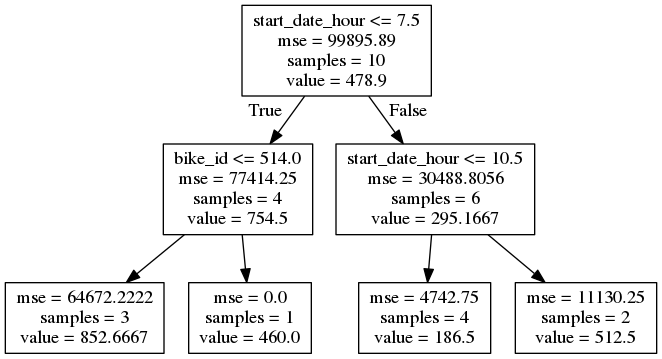

In [9]:
from IPython.display import Image
Image(filename='tree.png')